In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df = pd.read_csv("data/mongo_xdk_data.csv", index_col='ts')
df = df.drop('Unnamed: 0', 1)
df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d %H:%M')
print(df.shape) 
df.head()

C:\Users\pedro\AppData\Local\Temp\ipykernel_21840\3427607632.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0', 1)


(1059929, 14)


,thingId,acceleration.x,acceleration.y,acceleration.z,magneticStrength.x,magneticStrength.y,magneticStrength.z,illuminance,rotation.x,rotation.y,rotation.z,temperature,humidity,pressure
ts,,,,,,,,,,,,,,
2022-04-01 22:03,av101:XDK_01,-92,-948,-67,97,16,-11,0,122,-305,244,16.711,48,101418
2022-04-01 22:03,av101:XDK_01,-89,-947,-66,76,13,-47,0,183,183,0,16.701,48,101420
2022-04-01 22:03,av101:XDK_01,-97,-945,-63,86,16,-8,0,183,-61,61,16.711,48,101427
2022-04-01 22:03,av101:XDK_01,-84,-950,-64,86,11,-52,0,0,0,-61,16.721,48,101426
2022-04-01 22:03,av101:XDK_01,-92,-951,-67,82,14,2,0,0,-183,-61,16.711,48,101429


In [16]:
df2 = pd.read_csv("data/mongo_av101_data.csv", index_col='ts')
df2 = df2.drop('Unnamed: 0', 1)
df2.index = pd.to_datetime(df2.index).strftime('%Y-%m-%d %H:%M')
print(df2.shape) 
df2.head()

C:\Users\pedro\AppData\Local\Temp\ipykernel_21840\1768101134.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df2.drop('Unnamed: 0', 1)


(1073292, 62)


,thingId,S_SUM,I_SUM,H_TDH_I_L3_N,U_L3_L1,H_TDH_I_L1_N,C_phi_L1,RealEd_SUM,P_L2,P_L1,...,ReacE_L1,RealE_SUM,AE_SUM,S_L3,H_TDH_U_L3_N,S_L2,S_L1,H_TDH_U_L1_N,U_L1_N,ReacE_SUM
ts,,,,,,,,,,,,,,,,,,,,,
2022-04-01 22:03,av101:compressor1,126492.63,0.85,57.56,411.28,47.89,0.97,0,34636.20,39803.92,...,12350663,175474032,199361376,40648.13,6.87,40319.07,45525.43,6.27,237.84,36483944
2022-04-01 22:03,av101:compressor1,127120.84,0.91,53.89,412.16,48.15,0.97,0,35852.80,38590.49,...,12350666,175474064,199361408,41287.61,7.41,41523.16,44310.08,7.01,238.43,36483952
2022-04-01 22:03,av101:compressor1,129115.84,0.86,56.19,410.82,46.70,0.98,0,35375.59,40877.52,...,12350668,175474096,199361440,41679.52,6.82,40978.16,46458.17,6.25,237.63,36483960
2022-04-01 22:03,av101:compressor1,127855.45,1.03,53.66,412.70,48.94,0.98,0,34840.50,38692.93,...,12350671,175474128,199361472,42743.32,6.86,40901.21,44210.91,6.59,238.55,36483968
2022-04-01 22:03,av101:compressor1,128682.84,0.93,56.82,410.92,47.15,0.98,0,35342.48,40678.94,...,12350674,175474144,199361520,41432.55,6.80,40921.10,46329.19,6.27,237.67,36483976


In [17]:
df = df.groupby(df.index).mean()
print(df.shape)
df.head()

(17916, 13)


,acceleration.x,acceleration.y,acceleration.z,magneticStrength.x,magneticStrength.y,magneticStrength.z,illuminance,rotation.x,rotation.y,rotation.z,temperature,humidity,pressure
ts,,,,,,,,,,,,,
2022-04-01 21:58,-94.666667,-944.666667,-60.333333,85.444444,13.000000,-25.000000,0.0,13.555556,-88.111111,27.111111,16.704333,49.0,101421.222222
2022-04-01 21:59,-94.068966,-949.310345,-66.655172,84.655172,13.000000,-26.120690,0.0,38.913793,-75.724138,35.758621,16.742034,48.5,101422.706897
2022-04-01 22:00,-95.433333,-949.050000,-65.366667,84.900000,13.083333,-25.700000,0.0,81.333333,-78.283333,37.616667,16.772333,48.0,101423.183333
2022-04-01 22:01,-94.861111,-948.777778,-67.166667,84.722222,13.111111,-26.194444,0.0,33.888889,-72.861111,59.305556,16.776833,48.0,101423.027778
2022-04-01 22:03,-93.818182,-946.818182,-63.545455,84.000000,13.454545,-27.727273,0.0,122.000000,-105.363636,55.454545,16.711000,48.0,101422.545455


In [18]:
df2 = df2.groupby(df2.index).mean()
print(df2.shape)
df2.head()

(17911, 61)


,S_SUM,I_SUM,H_TDH_I_L3_N,U_L3_L1,H_TDH_I_L1_N,C_phi_L1,RealEd_SUM,P_L2,P_L1,P_L3,...,ReacE_L1,RealE_SUM,AE_SUM,S_L3,H_TDH_U_L3_N,S_L2,S_L1,H_TDH_U_L1_N,U_L1_N,ReacE_SUM
ts,,,,,,,,,,,,,,,,,,,,,
2022-04-01 21:58,149017.136923,1.085000,46.546923,412.949231,42.878462,0.975385,0.0,44133.665769,45966.841923,42012.821154,...,1.234986e+07,1.754653e+08,1.993511e+08,48115.199231,6.676538,49344.557692,51557.376923,6.310769,238.767692,3.648182e+07
2022-04-01 21:59,149258.717000,1.074167,46.591833,412.805500,43.020500,0.972500,0.0,44455.749000,45921.133167,41803.113667,...,1.234998e+07,1.754669e+08,1.993529e+08,47922.080333,6.806667,49689.813667,51646.820500,6.419500,238.725167,3.648217e+07
2022-04-01 22:00,127528.309333,0.915500,56.362500,412.796833,49.680833,0.968667,0.0,36472.175333,38625.150333,34207.254000,...,1.235016e+07,1.754690e+08,1.993553e+08,40971.901333,6.544333,41996.666833,44559.741000,6.178500,238.692167,3.648264e+07
2022-04-01 22:01,111254.214167,0.802778,64.105000,412.316667,54.510833,0.967500,0.0,29998.746944,33447.270000,28162.318611,...,1.235028e+07,1.754703e+08,1.993568e+08,35782.956944,6.317222,35883.705000,39587.552500,5.895278,238.407222,3.648296e+07
2022-04-01 22:03,128511.155000,0.917500,55.588333,411.468333,47.931667,0.975833,0.0,35287.885833,39903.917500,34497.498333,...,1.235068e+07,1.754742e+08,1.993616e+08,41900.250000,6.856667,41042.385833,45568.519167,6.400000,237.972500,3.648399e+07


In [24]:
def unique_cols(df):
    a = df.to_numpy() # df.values (pandas<0.24)
    return (a[0] == a).all(0)

df2 = df2.loc[:,np.invert(unique_cols(df2))]
print(df2.shape)
df2.tail()

(17911, 56)


,S_SUM,I_SUM,H_TDH_I_L3_N,U_L3_L1,H_TDH_I_L1_N,C_phi_L1,P_L2,P_L1,P_L3,ReacEc_L1,...,ReacE_L1,RealE_SUM,AE_SUM,S_L3,H_TDH_U_L3_N,S_L2,S_L1,H_TDH_U_L1_N,U_L1_N,ReacE_SUM
ts,,,,,,,,,,,,,,,,,,,,,
2022-04-14 08:42,195.879500,0.833833,115.334000,406.150667,100.0,0.0,0.0,0.0,124.260000,112.64,...,14098948.0,197559088.0,2.244853e+08,195.879500,2.998833,0.0,0.0,2.978833,234.500833,41034176.0
2022-04-14 08:43,205.543220,0.875593,117.075254,405.953559,100.0,0.0,0.0,0.0,129.906949,112.64,...,14098948.0,197559088.0,2.244853e+08,205.543220,2.927458,0.0,0.0,2.896949,234.434407,41034176.0
2022-04-14 08:44,214.866333,0.905833,120.429500,410.188833,100.0,0.0,0.0,0.0,134.342000,112.64,...,14098948.0,197559088.0,2.244853e+08,214.866333,2.872833,0.0,0.0,2.833000,236.948667,41034176.0
2022-04-14 08:45,221.993333,0.936444,118.302000,409.854889,100.0,0.0,0.0,0.0,139.195111,112.64,...,14098948.0,197559088.0,2.244853e+08,221.993333,2.872889,0.0,0.0,2.843556,236.677556,41034176.0
2022-04-14 08:46,204.409216,0.863333,118.254510,408.792549,100.0,0.0,0.0,0.0,127.811176,112.64,...,14098948.0,197559088.0,2.244853e+08,204.409216,2.811176,0.0,0.0,2.764510,236.124314,41034176.0


In [25]:
df3 = df2.join(df)
df3.head()


,S_SUM,I_SUM,H_TDH_I_L3_N,U_L3_L1,H_TDH_I_L1_N,C_phi_L1,P_L2,P_L1,P_L3,ReacEc_L1,...,magneticStrength.x,magneticStrength.y,magneticStrength.z,illuminance,rotation.x,rotation.y,rotation.z,temperature,humidity,pressure
ts,,,,,,,,,,,,,,,,,,,,,
2022-04-01 21:58,149017.136923,1.085000,46.546923,412.949231,42.878462,0.975385,44133.665769,45966.841923,42012.821154,112.3,...,85.444444,13.000000,-25.000000,0.0,13.555556,-88.111111,27.111111,16.704333,49.0,101421.222222
2022-04-01 21:59,149258.717000,1.074167,46.591833,412.805500,43.020500,0.972500,44455.749000,45921.133167,41803.113667,112.3,...,84.655172,13.000000,-26.120690,0.0,38.913793,-75.724138,35.758621,16.742034,48.5,101422.706897
2022-04-01 22:00,127528.309333,0.915500,56.362500,412.796833,49.680833,0.968667,36472.175333,38625.150333,34207.254000,112.3,...,84.900000,13.083333,-25.700000,0.0,81.333333,-78.283333,37.616667,16.772333,48.0,101423.183333
2022-04-01 22:01,111254.214167,0.802778,64.105000,412.316667,54.510833,0.967500,29998.746944,33447.270000,28162.318611,112.3,...,84.722222,13.111111,-26.194444,0.0,33.888889,-72.861111,59.305556,16.776833,48.0,101423.027778
2022-04-01 22:03,128511.155000,0.917500,55.588333,411.468333,47.931667,0.975833,35287.885833,39903.917500,34497.498333,112.3,...,84.000000,13.454545,-27.727273,0.0,122.000000,-105.363636,55.454545,16.711000,48.0,101422.545455


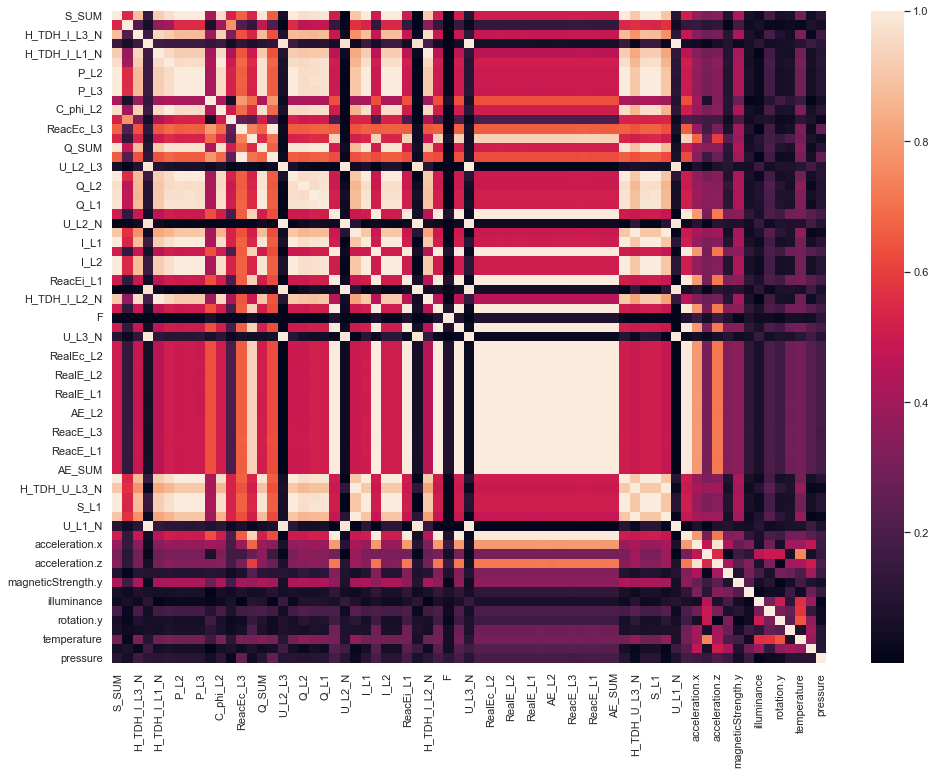

In [27]:
import seaborn as sns
sns.set(rc={'figure.figsize':(16, 12)})
corr_matrix = df3.corr().abs()
ax = sns.heatmap(corr_matrix)

In [29]:
def create_corr_group(corr, threshold=0.9):
    # Select upper triangle of correlation matrix
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    groups = {}
    for ind in range(len(upper.columns)):
        found = False
        col = upper.columns[ind]
        for g in groups:
            val = upper[col][g[1]]
            if val >= threshold:
                groups[g].append(col)
                found = True
                break
        if not found:
            groups[(col, ind)] = [col]
    return groups

corr_groups = create_corr_group(corr_matrix, threshold=0.90)

In [30]:
corr_groups

{('S_SUM', 0): ['S_SUM',
  'H_TDH_I_L1_N',
  'C_phi_L1',
  'P_L2',
  'P_L1',
  'P_L3',
  'C_phi_L2',
  'Q_SUM',
  'P_SUM',
  'Q_L2',
  'Q_L3',
  'Q_L1',
  'H_TDH_U_L2_N',
  'I_L1',
  'I_L2',
  'I_L3',
  'H_TDH_I_L2_N',
  'S_L3',
  'H_TDH_U_L3_N',
  'S_L2',
  'S_L1',
  'H_TDH_U_L1_N'],
 ('I_SUM', 1): ['I_SUM'],
 ('H_TDH_I_L3_N', 2): ['H_TDH_I_L3_N'],
 ('U_L3_L1', 3): ['U_L3_L1',
  'U_L2_L3',
  'U_L2_N',
  'U_L1_L2',
  'U_L3_N',
  'U_L1_N'],
 ('ReacEc_L1', 9): ['ReacEc_L1'],
 ('C_phi_L3', 11): ['C_phi_L3'],
 ('ReacEc_L3', 12): ['ReacEc_L3', 'ReacEc_SUM'],
 ('ReacEc_L2', 13): ['ReacEc_L2',
  'ReacEi_SUM',
  'RealEc_SUM',
  'ReacEi_L1',
  'ReacEi_L3',
  'ReacEi_L2',
  'RealEc_L1',
  'RealEc_L2',
  'RealEc_L3',
  'RealE_L2',
  'RealE_L3',
  'RealE_L1',
  'AE_L1',
  'AE_L2',
  'AE_L3',
  'ReacE_L3',
  'ReacE_L2',
  'ReacE_L1',
  'RealE_SUM',
  'AE_SUM',
  'ReacE_SUM'],
 ('F', 32): ['F'],
 ('acceleration.x', 56): ['acceleration.x', 'acceleration.z'],
 ('acceleration.y', 57): ['acceleration.y'

In [33]:
df2.to_csv('data/mongo_filtered_av101_mins.csv')
